In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/train (2).csv')

In [ ]:
data.head(20)

,url,type
0,http://neues-atelierhaus-panzerhalle.de/kuenst...,defacement
1,http://www.envest.com.br/professormenu?action=...,defacement
2,home.roadrunner.com/~bmerkey/cheatsheet.htm,phishing
3,http://amusementlamp.com/en/YJLED_007_SM_Serie...,defacement
4,http://www.impactosmt.com.br/index.php?option=...,defacement
5,http://pastehtml.com/view/bebxga5a6.html,phishing
6,http://www.vilagnomad.com/wp-content/themes/ce...,malware
7,www.soyouwanna.com/site/syws/bizplan/bizplan.html,phishing
8,http://mail.chasebankverifications.com/1yzqyzt...,phishing
9,www.paypal.com.us.webscrlcmdl.login.submit.dis...,benign


In [ ]:
data.shape


(35000, 2)

In [ ]:
data.nunique()

url     33211
type        4
dtype: int64

In [ ]:
import pandas as pd
import re
from urllib.parse import urlparse
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = '/content/train (2).csv'
data = pd.read_csv(file_path)

# Function to extract features from a URL
def extract_features(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    path = parsed_url.path
    query = parsed_url.query

    return {
        'domain_length': len(domain),
        'path_length': len(path),
        'query_length': len(query),
        'has_query': 1 if query else 0,
        'has_https': 1 if parsed_url.scheme == 'https' else 0,
        'num_digits_in_url': sum(c.isdigit() for c in url),
        'num_special_chars_in_url': len(re.findall(r'\W', url)),
        'domain_entropy': calculate_entropy(domain)
    }

# Function to calculate the entropy of a string
def calculate_entropy(string):
    from collections import Counter
    import math
    prob = [n_x/len(string) for x,n_x in Counter(string).items()]
    entropy = -sum([p * math.log(p, 2) for p in prob])
    return entropy

# Apply feature extraction to each URL
features = data['url'].apply(extract_features)
features_df = pd.DataFrame(features.tolist())

# Concatenate the original data with the new features
data = pd.concat([data, features_df], axis=1)

# Drop the original URL column as it's no longer needed
data.drop(columns=['url'], inplace=True)

data.head()


,type,domain_length,path_length,query_length,has_query,has_https,num_digits_in_url,num_special_chars_in_url,domain_entropy
0,defacement,32,30,0,0,0,0,10,3.612301
1,defacement,17,14,23,1,0,0,9,3.410417
2,phishing,0,43,0,0,0,0,6,0.000000
3,defacement,17,33,0,0,0,6,9,3.381580
4,defacement,21,10,224,1,0,35,16,3.427333


In [ ]:
# Encode the labels
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

data.head()


,type,domain_length,path_length,query_length,has_query,has_https,num_digits_in_url,num_special_chars_in_url,domain_entropy
0,1,32,30,0,0,0,0,10,3.612301
1,1,17,14,23,1,0,0,9,3.410417
2,3,0,43,0,0,0,0,6,0.000000
3,1,17,33,0,0,0,6,9,3.381580
4,1,21,10,224,1,0,35,16,3.427333


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target (y)
X = data.drop(columns=['type'])
y = data['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.8352857142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1700
           1       0.89      0.98      0.93      1739
           2       0.96      0.92      0.94      1729
           3       0.76      0.63      0.69      1832

    accuracy                           0.84      7000
   macro avg       0.84      0.84      0.83      7000
weighted avg       0.83      0.84      0.83      7000



In [ ]:
import re
from urllib.parse import urlparse

# Function to extract features from a URL
def extract_features(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    path = parsed_url.path
    query = parsed_url.query

    return {
        'domain_length': len(domain),
        'path_length': len(path),
        'query_length': len(query),
        'has_query': 1 if query else 0,
        'has_https': 1 if parsed_url.scheme == 'https' else 0,
        'num_digits_in_url': sum(c.isdigit() for c in url),
        'num_special_chars_in_url': len(re.findall(r'\W', url)),
        'domain_entropy': calculate_entropy(domain)
    }

# Function to calculate the entropy of a string
def calculate_entropy(string):
    from collections import Counter
    import math
    prob = [n_x / len(string) for x, n_x in Counter(string).items()]
    entropy = -sum([p * math.log(p, 2) for p in prob])
    return entropy

# Apply feature extraction to each URL in the test dataset
test_data = pd.read_excel('/content/test.xlsx')
test_features = test_data['url'].apply(extract_features)
test_features_df = pd.DataFrame(test_features.tolist())

# Make predictions using the trained model
test_predictions = model.predict(test_features_df)

# Map the numerical predictions back to the original labels
test_data['predicted_type'] = label_encoder.inverse_transform(test_predictions)

# Display the test data with predictions
test_data


,url,predicted_type
0,amazon.com/s?ie=UTF8&keywords=Thomson%2C%20Vir...,benign
1,www.angelfire.com/scifi/Mohanty/,phishing
2,http://www.kwedu.cn/uploadfile/53104/2013/0108...,malware
3,pastehtml.com/view/b7u8s7q3n.html,phishing
4,http://162.212.114.38:50727/Mozi.m,malware
...,...,...
14995,http://foroalcazares.com/index.php/turismoguia...,defacement
14996,http://stockmarketinvestingforbeginners.com/co...,defacement
14997,http://82.166.57.2:28561/.i,malware
14998,http://112.17.94.217:42870/Mozi.m,malware


In [ ]:
# General information about the dataset
data.info()

# Summary statistics
data.describe()


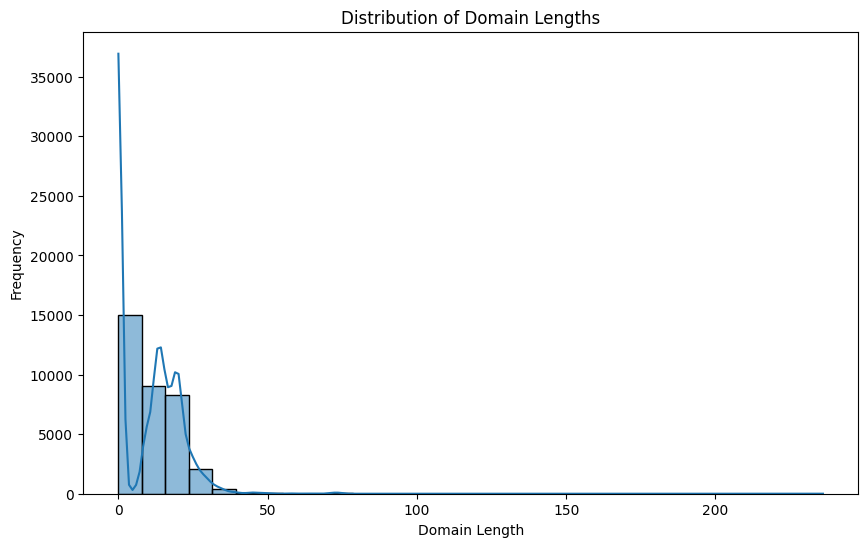

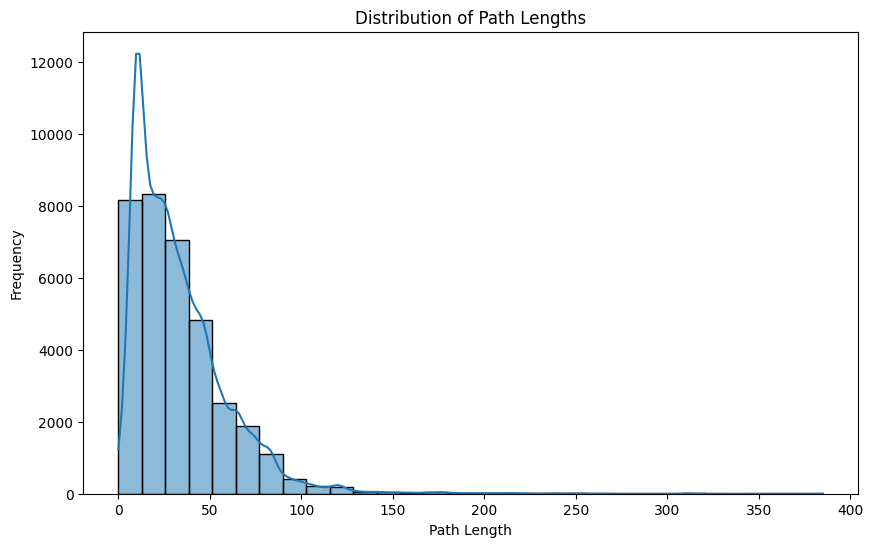

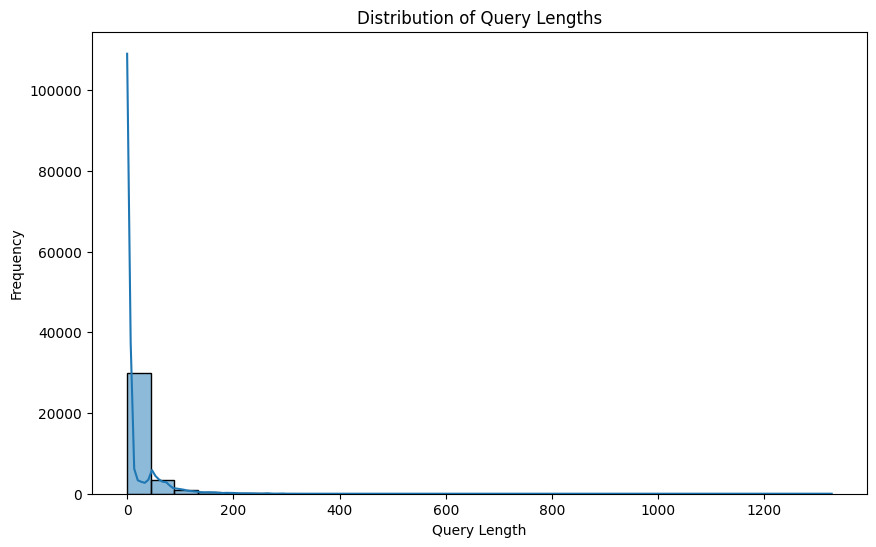

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# If 'url' column is present
if 'url' in data.columns:
    data['url_length'] = data['url'].apply(len)
    plt.figure(figsize=(10, 6))
    sns.histplot(data['url_length'], kde=True, bins=30)
    plt.title('Distribution of URL Lengths')
    plt.xlabel('URL Length')
    plt.ylabel('Frequency')
    plt.show()

# Distribution of domain lengths
if 'domain_length' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data['domain_length'], kde=True, bins=30)
    plt.title('Distribution of Domain Lengths')
    plt.xlabel('Domain Length')
    plt.ylabel('Frequency')
    plt.show()

# Distribution of path lengths
if 'path_length' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data['path_length'], kde=True, bins=30)
    plt.title('Distribution of Path Lengths')
    plt.xlabel('Path Length')
    plt.ylabel('Frequency')
    plt.show()

# Distribution of query lengths
if 'query_length' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data['query_length'], kde=True, bins=30)
    plt.title('Distribution of Query Lengths')
    plt.xlabel('Query Length')
    plt.ylabel('Frequency')
    plt.show()


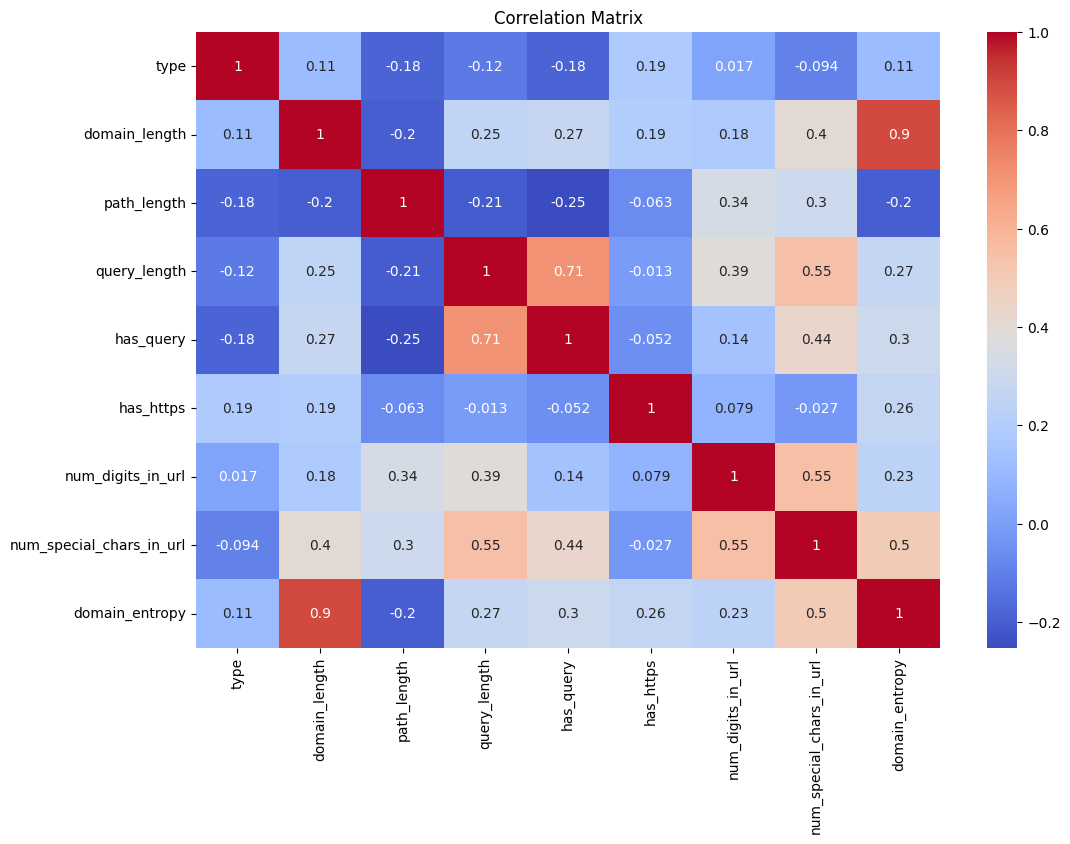

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
